In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('/content/BlinkIT Grocery Data.xlsx')

In [3]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [6]:
pd.isnull(df).sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [9]:
#Handling null values

df['Outlet Size'] = df['Outlet Size'].fillna('Unknown')
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())

In [10]:
##**Exploratory Data Analysis**

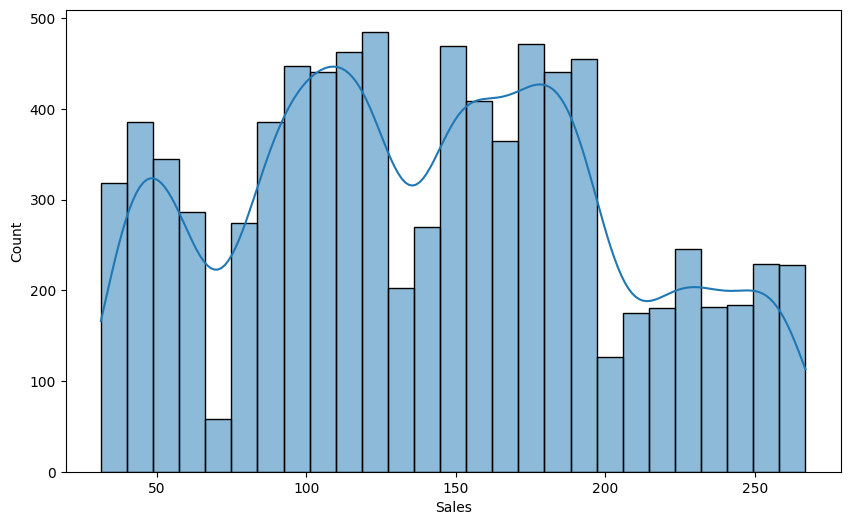

In [12]:
# This helps identify if sales data is normally distributed or skewed.
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], kde=True)
plt.show()

In [ ]:
#conclusion from graph

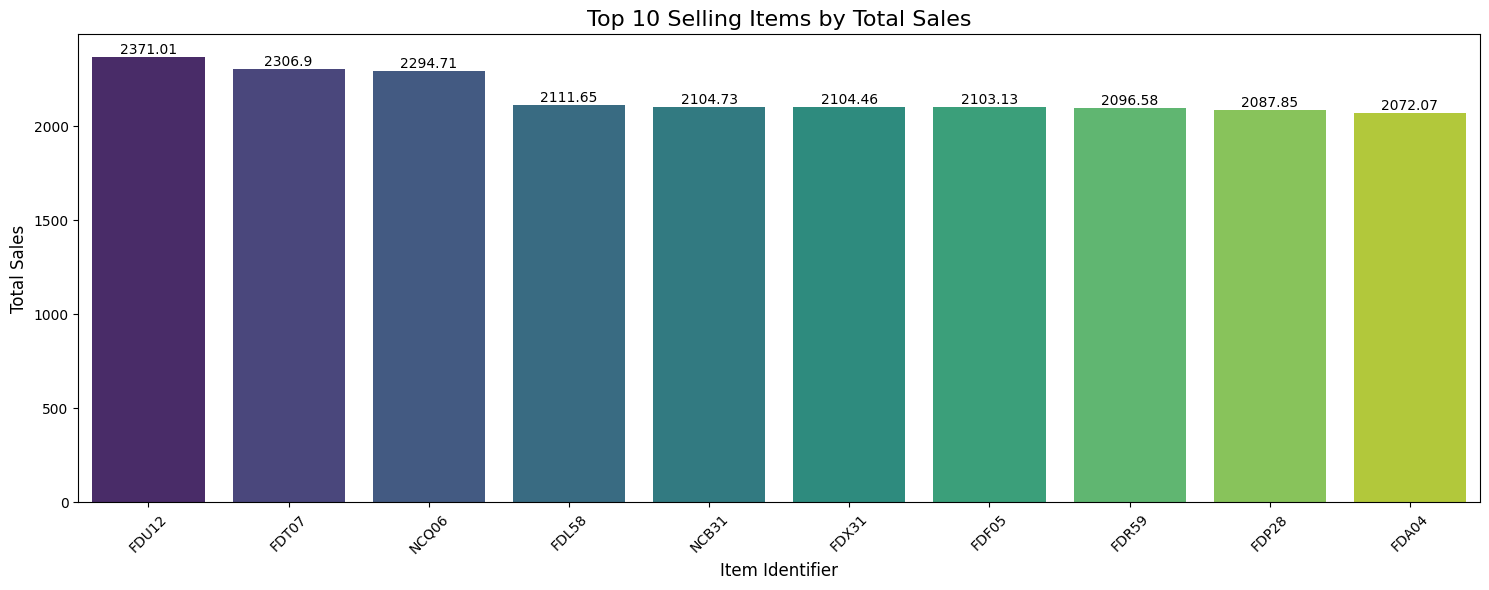

In [14]:
# Identifying Top Selling Items
# Group by 'Item_Identifier' and sum 'Item_Outlet_Sales' to find the total sales per item
top_selling_items = (df.groupby(['Item Identifier'], as_index=False)['Sales']
                       .sum()
                       .sort_values(by='Sales', ascending=False)
                       .head(10))

plt.figure(figsize=(15, 6))
plt.clf()
ax = sns.barplot(x='Item Identifier', y='Sales', data=top_selling_items, palette='viridis')

ax.set_title('Top 10 Selling Items by Total Sales', fontsize=16)
ax.set_xlabel('Item Identifier', fontsize=12)
ax.set_ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

In [ ]:

#From above graphs we can see that the Top Selling Items with the Identifiers are: FDU12, FDT07, NCQ06, FDL58, NCB31, FDX31, FDF05, FDR59, FDP28 and FDA04

In [ ]:
#calculate and analyze outlet Age

In [15]:
from datetime import datetime
current_year = datetime.now().year  # Automatically fetches the current year

In [18]:
df['Outlet Age'] = current_year - df['Outlet Establishment Year']

In [20]:
print(df['Outlet Age'].describe())

count    8523.000000
mean        8.549454
std         3.189396
min         3.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        14.000000
Name: Outlet Age, dtype: float64


In [ ]:
#The dataset contains data for 8,523 outlets. The youngest outlet is 15 years old, while the oldest is 39 years old. The majority of outlets are relatively mature (20–37 years old). Older outlets (37+ years) may represent well-established locations, which could be leveraged for strategies like branding or loyalty programs

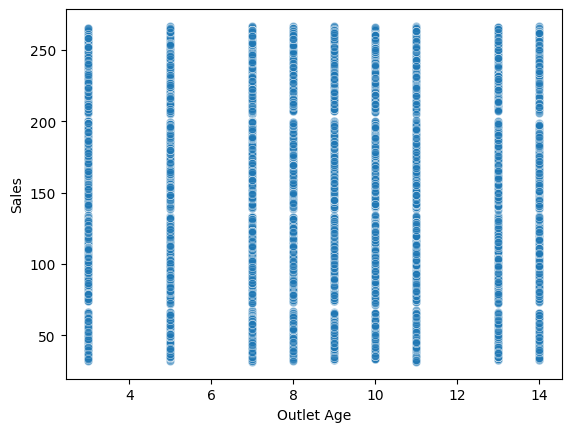

<Figure size 1000x600 with 0 Axes>

In [23]:
sns.scatterplot(x='Outlet Age', y='Sales', data=df, alpha=0.6)
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
#AVERAGE SALES BY OUTLET TYPE

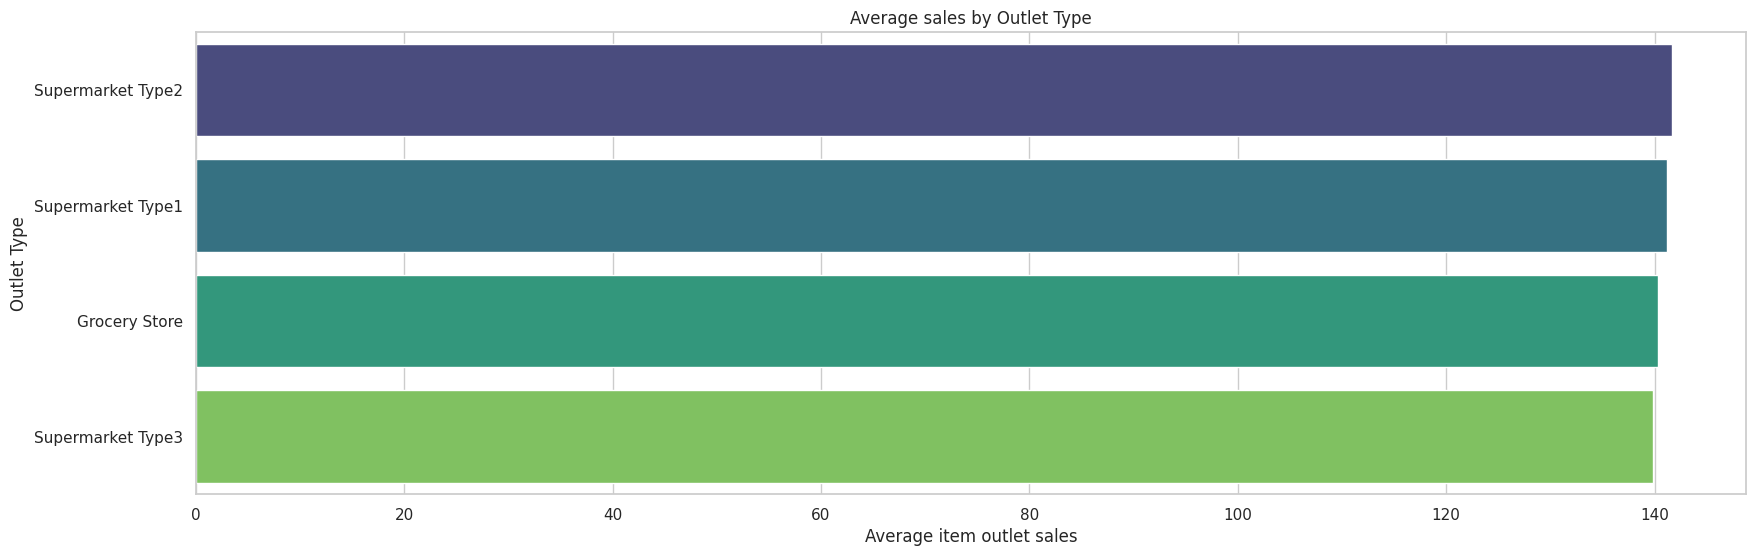

In [29]:
avg_sales_by_outlet = df.groupby(['Outlet Type'], as_index = False)['Sales'].mean().sort_values(by ='Sales', ascending = False)
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.barplot(x = 'Sales', y = 'Outlet Type', data = avg_sales_by_outlet, palette ='viridis' )
plt.title('Average sales by Outlet Type')
plt.xlabel('Average item outlet sales')
plt.ylabel('Outlet Type')
plt.show()

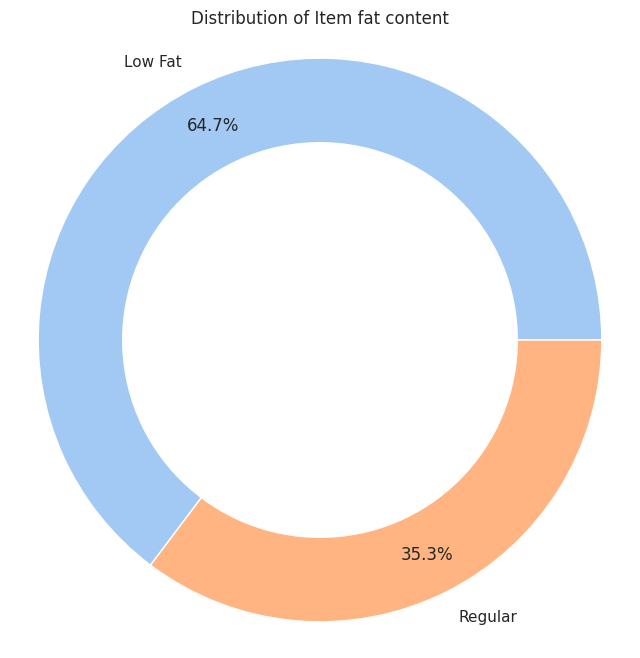

In [34]:
#DISTRIBUTION OF ITEM BY D=FAT CONTENT
# Mapping to set the label of correct data
fat_content_mapping = {
    'Low Fat': 'Low Fat',
    'Regular': 'Regular',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'low fat': 'Low Fat'
}

# Replace the values in the Item_Fat_Content column
df['Item Fat Content'] = df['Item Fat Content'].replace(fat_content_mapping)
fat_content_counts = df['Item Fat Content'].value_counts()
labels = fat_content_counts.index
sizes = fat_content_counts.values
plt.figure(figsize=(8,8))
colors = sns.color_palette("pastel")
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Item fat content')
plt.show()

In [ ]:
#The pie chart shows A larger percentage of products are labeled as Low Fat, suggesting a higher demand.

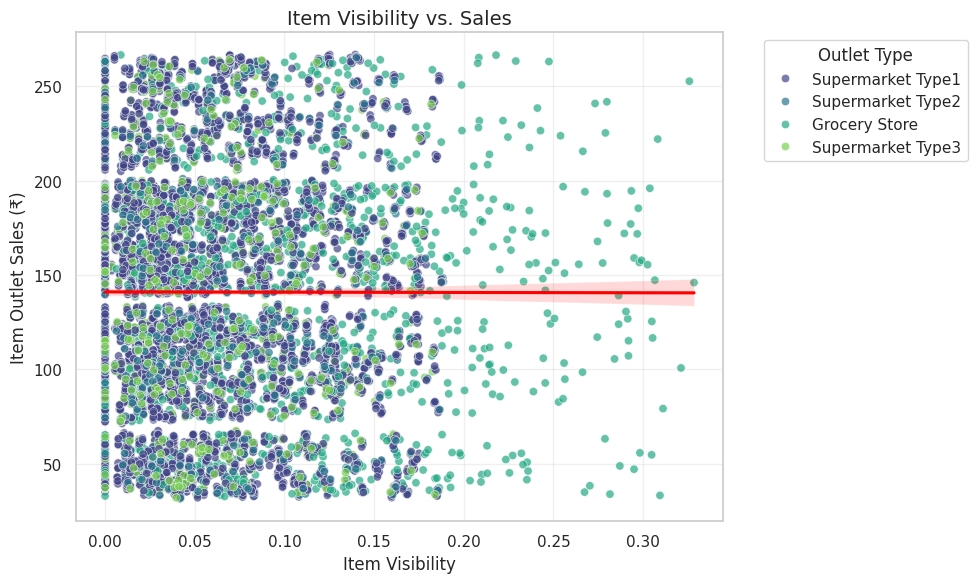

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Visibility', y='Sales', data=df, hue='Outlet Type', alpha=0.7, palette='viridis')

# Adding trend line
sns.regplot(x='Item Visibility', y='Sales', data=df, scatter=False, color='red', line_kws={'label':'Trend Line'})

# Adding title and labels
plt.title('Item Visibility vs. Sales', fontsize=14)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Item Outlet Sales (₹)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Outlet Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
#The scatter plot with a trend line demonstrates that There is a slightly negative correlation between Item_Visibility and Item_Outlet_Sales. As visibility increases, sales tend to decrease marginally, as shown by the downward sloping trend line. Supermarket Type 3 has the highest sales range compared to other outlet types, even at lower visibility. Grocery Store shows consistently lower sales across all visibility ranges.

#The majority of the items are clustered at lower visibility values (close to 0.0), indicating that most items are less visible, yet generate significant sales

In [ ]:
#Model Performance:

"""R-squared: 0.2494 (indicating moderate explanatory power) Mean Squared Error: 2040224.3989

Key Insights:

Low Visibility but High Predicted Sales: Identified items that have low visibility (below 0.05) but high predicted sales potential (MRP). These items could be valuable but are not currently receiving adequate attention.

Business Recommendations:

Promotional Campaigns: Highlight high-MRP, low-visibility items with targeted promotions (e.g., online banners and in-store displays). Offer special discounts to draw customer interest.

Enhanced Placement: Physically position these items in prominent spots within the store to improve visibility. Feature them on the homepage or "featured" sections of the online platform.

Bundling Strategy: Bundle these items with popular or high-visibility products to encourage sales through cross-promotion.

Performance Monitoring: Track and analyze sales data from these visibility-focused strategies to refine and optimize campaigns.

Overall: Prioritize high-MRP, low-visibility items for strategic promotions and optimal placement to maximize sales potential.""'